## Parcial III: Emisiones de CO2

#### Cristian Serna
#### Laura Sofía Arango

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from matplotlib.cbook import boxplot_stats
import sklearn.linear_model as lm


### Punto 1:

In [2]:
# cargamos los datasets

# gases de efecto invernadero
emisiones=pd.read_csv('Datasets/Emisiones de gases de efecto invernadero totales/efecto_invernadero.csv')

# área selvática
area_selvatica=pd.read_csv('Datasets/╡rea selvática/area_selvatica.csv')

# crecimiento poblacional 
crecimiento_poblacional=pd.read_csv('Datasets/Crecimiento de la población Urbana/crecimiento_poblacional.csv')

### Punto 2:

In [3]:
# Visualizamos el dataset
emisiones

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFE,838050,948360,1342560,1381860,1406900,1436410,1436770,1457530,1471620,1478910,..,..
1,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFW,398170,553740,723970,740720,771100,790820,805370,835230,848650,881570,..,..
2,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,El mundo árabe,ARB,985720,1380740,2174340,2285760,2318020,2395260,2438650,2479110,2518170,2538650,..,..
3,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Estados pequeos del Caribe,CSS,44920,44910,56360,58520,57700,57020,56680,53830,53410,55020,..,..
4,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Europa Central y del Báltico,CEB,1280490,916490,902300,873260,845980,825390,837450,847240,870180,864510,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# De acuerdo con la previsualización del dataframe, los años 2019 y 2020 no tienen datos. Comprobemos qué datos únicos tienen:

emisiones.iloc[:266][['2019 [YR2019]', '2020 [YR2020]']].value_counts()

2019 [YR2019]  2020 [YR2020]
..             ..               266
dtype: int64

In [5]:
# Efectivamente, no hay datos para 2019 y 2020, por lo que omitimos estas columnas para nuestro análisis

valid_columns = emisiones.keys()[0:-2]

emisiones = emisiones.iloc[:266][valid_columns]

De una exporación básica del notebook se encontró que las colummnas 2019 [YR2019] y 2020 [YR2020] no poseían datos, entonces fueron eliminadas. También se encontró que de la fila 266 en adelante estaban vacías, entonces también se cortaron.

### Punto 3:

In [6]:
# Es de esperarse que no haya datos para todos los años de cada país.
# Eliminaremos los paises que no tengan datos para más de 2 años.

# Pero antes reemplacemos los valores faltantes representados por '..' por NaN.
emisiones = emisiones.replace('..', np.nan)

# Tomamos solo las columnas con datos numéricos para verificar los Nan
values_columns = emisiones.keys()[4:]

emisiones = emisiones[emisiones[values_columns].isnull().sum(axis=1) < 3]

emisiones[values_columns] = emisiones[values_columns].astype('float64')

Se reemplazan los strings  '..'  por Nan para posteriormente eliminar las filas que tiene más de tres datos faltantes.

In [7]:
# Vemos que en el dataset se incluyen distintas regiones geopolíticas: mundo entero, continentes, grupos de países, organizaciones, países, etc.
# Debemos de separar manualmente los datos de cada una de las regiones.

# Veamos la lista entera de regiones y países

emisiones['Country Name'].unique()

array([nan, 'El mundo árabe', 'Estados pequeos del Caribe',
       'Europa Central y del Báltico',
       'inicial del dividendo demográfico', 'Asia oriental y el Pacífico',
       'Asia oriental y el Pacífico (excluido altos ingresos)',
       'Asia oriental y el Pacífico (BIRF y la AIF)', 'Zona del Euro',
       'Europa y Asia central',
       'Europa y Asia central (excluido altos ingresos)',
       'Europa y Asia central (BIRF y la AIF)', 'Unión Europea',
       'Frágiles y situaciones de conflicto afectados',
       'Países pobres muy endeudados (PPME)', 'Ingreso alto', 'Sólo BIRF',
       'BIRF y la AIF', 'mezcla de la AIF', 'Sólo AIF', 'total de la AIF',
       'avanzada del dividendo demográfico', 'América Latina y el Caribe',
       'América Latina y el Caribe (excluido altos ingresos)',
       'América Latina y el Caribe (BIRF y la AIF)',
       'Países menos desarrollados: clasificación de las Naciones Unidas',
       'Ingreso mediano y bajo', 'Países de ingreso bajo',
     

In [8]:
# Dividimos el dataset en uno de país y otro de regiones
# Afganistán es el primer país de la lista

pos_afganistan = emisiones[emisiones['Country Name']=='Afganistán'].index[0]

emision_region = emisiones.iloc[:pos_afganistan-2]
emision_pais = emisiones.iloc[pos_afganistan-1:]

emision_pais.reset_index(drop=True, inplace=True)

# Los datos faltantes se rellenan con el valor mínimo del país, correspondiente al año 2000
for i in emision_pais[emision_pais['1990 [YR1990]'].isnull()].index:
    emision_pais.iloc[i,4] = emision_pais.iloc[i,5]

/home/cs/anaconda3/envs/MLTF/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Finalmente para que los datos sean más representativos se divide el dataset entre paices y las otras clasificaciones existentes (como regiones y nivel de ingresos), para posteriormente reemplazar los Nan por el valor mínimo del país correspondiente.

### Punto 4

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


30.0 235510.0


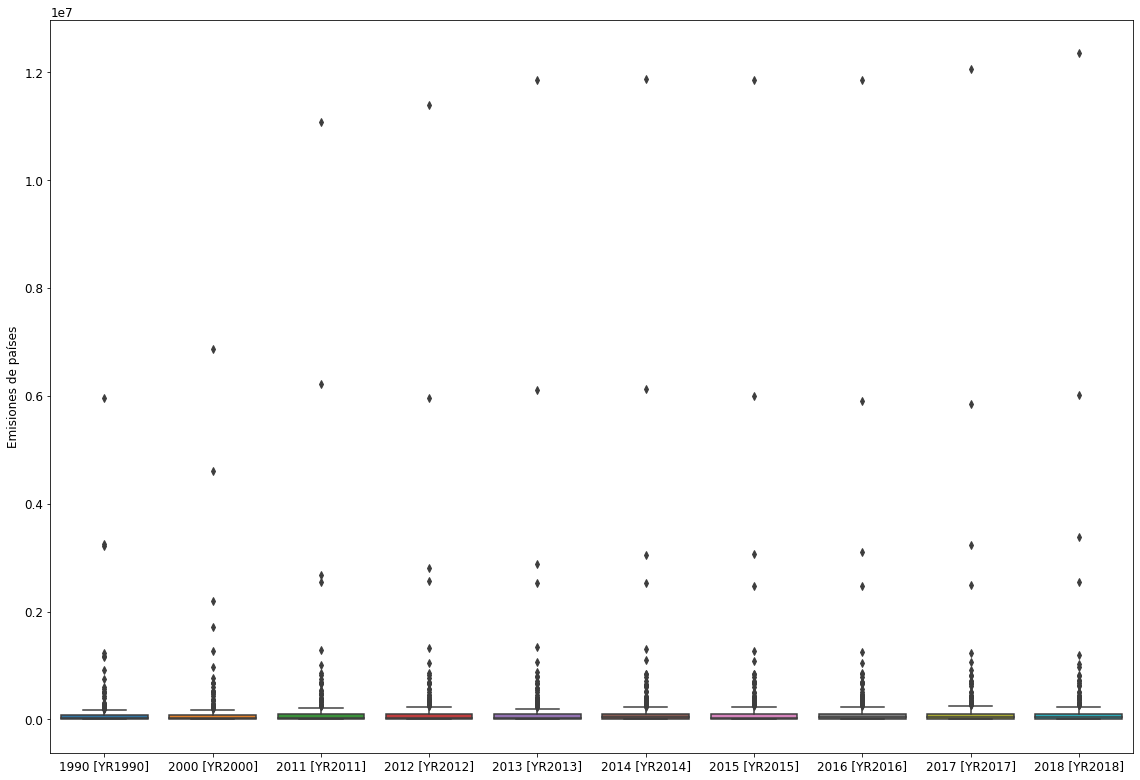

In [9]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

# se realiza el boxplot para todos los países
plt.figure(figsize=(16,11))
plt.ylabel('Emisiones de países')
box_plot = sns.boxplot(data=emision_pais, orient= 'v')

plt.tight_layout()

# se calculan los valores máximos y mínimos para los valores no atípicos del año 2018
low_whisker = boxplot_stats(emision_pais['2018 [YR2018]'])[0]['whislo']
high_whisker = boxplot_stats(emision_pais['2018 [YR2018]'])[0]['whishi']

print(low_whisker, high_whisker)

De acuerdo con el boxplot, sí existen datos atípicos, los cuales corresponden a los países de mayores emisiones.

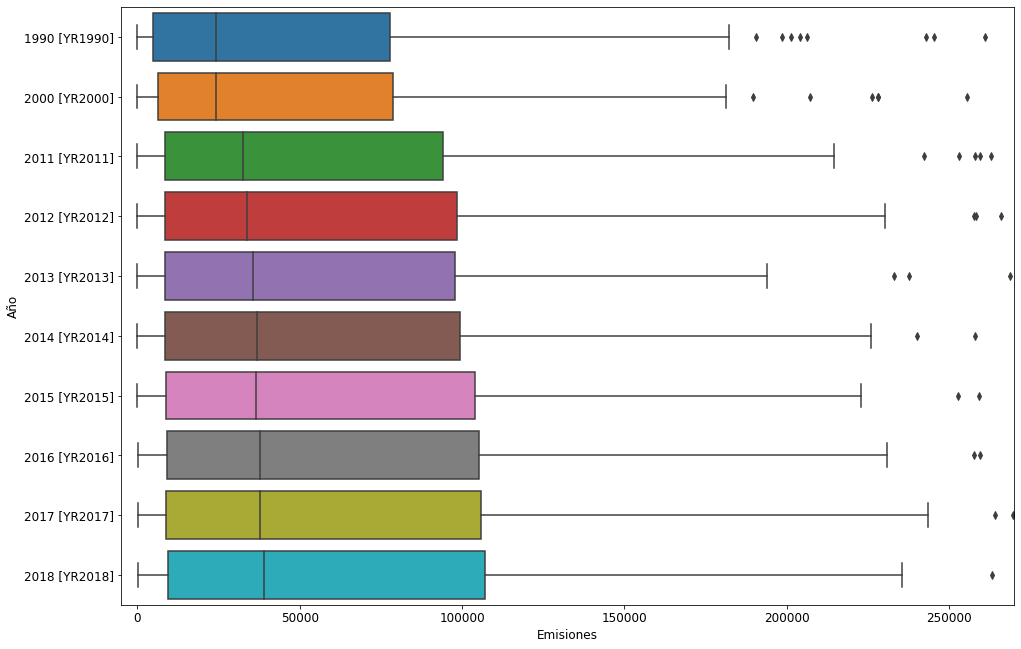

In [10]:
# La cota inferior para valores atípicos corresponde con el valor mínimo minimo del dataset, entonces solo excluimos con el bigote superior.
emision_pais_filtrado = emision_pais[emision_pais['2018 [YR2018]'] < high_whisker]

# Redifinimos los índices en el nuevo dataframe para poder ubicar de acuerdo a estos
emision_pais_filtrado.reset_index(drop=True, inplace=True)

# Veamos el gráfico más de cerca excluyendo la mayoría de los datos atípicos.

plt.figure(figsize=(16,11))
plt.xlabel('Emisiones')
plt.ylabel('Año')
plt.xlim(-5000, 270000)
box_plot = sns.boxplot(data=emision_pais, orient= 'h')

### Punto 5:

En la tabla se muestran los valores medios de las emisiones de CO2 por año, excluyendo los valores atípicos.

In [11]:
# calculamos la media de emisiones por año 
emision_pais_filtrado[values_columns].mean()

1990 [YR1990]    31545.660377
2000 [YR2000]    32693.836478
2011 [YR2011]    39246.289308
2012 [YR2012]    39955.031447
2013 [YR2013]    40226.477987
2014 [YR2014]    40590.691824
2015 [YR2015]    41218.238994
2016 [YR2016]    41906.855346
2017 [YR2017]    42332.389937
2018 [YR2018]    42662.264151
dtype: float64

In [12]:
# Ahora se procede a calcular la diferencia entre las emisiones en Colombia entre el año 2000 y 2018

emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia']


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
31,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Colombia,COL,124290.0,139710.0,166910.0,165340.0,172010.0,175230.0,176980.0,180940.0,177470.0,184100.0


In [13]:
# Ahora que vimos en que posición se encuentra Colombia procedamos a calcular la diferencia entre las emisiones

e_2000=emision_pais_filtrado['2000 [YR2000]'][emision_pais_filtrado['Country Name']=='Colombia'].values[0]
e_2018=emision_pais_filtrado['2018 [YR2018]'][emision_pais_filtrado['Country Name']=='Colombia'].values[0]

print(f'La diferencia de las emisiones en Colombia entre los años 2000 y 2018 es de {(e_2018-e_2000)}, es decir, las emisiones aumentaron en un {np.round(100*(e_2018-e_2000)/e_2000,2)}% ')


La diferencia de las emisiones en Colombia entre los años 2000 y 2018 es de 44390.0, es decir, las emisiones aumentaron en un 31.77% 


### Punto 6:

In [14]:
# Encontramos los 10 países con mayores emisiones y los 10 países con menos emisiones
min_emision = emision_pais_filtrado.iloc[emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=True).index[0:10]]
max_emision = emision_pais_filtrado.iloc[emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=False).index[0:10]]

# Sacamos las emisiones de Colombia para todos los años
emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia'][values_columns].values[0]

array([124290., 139710., 166910., 165340., 172010., 175230., 176980.,
       180940., 177470., 184100.])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


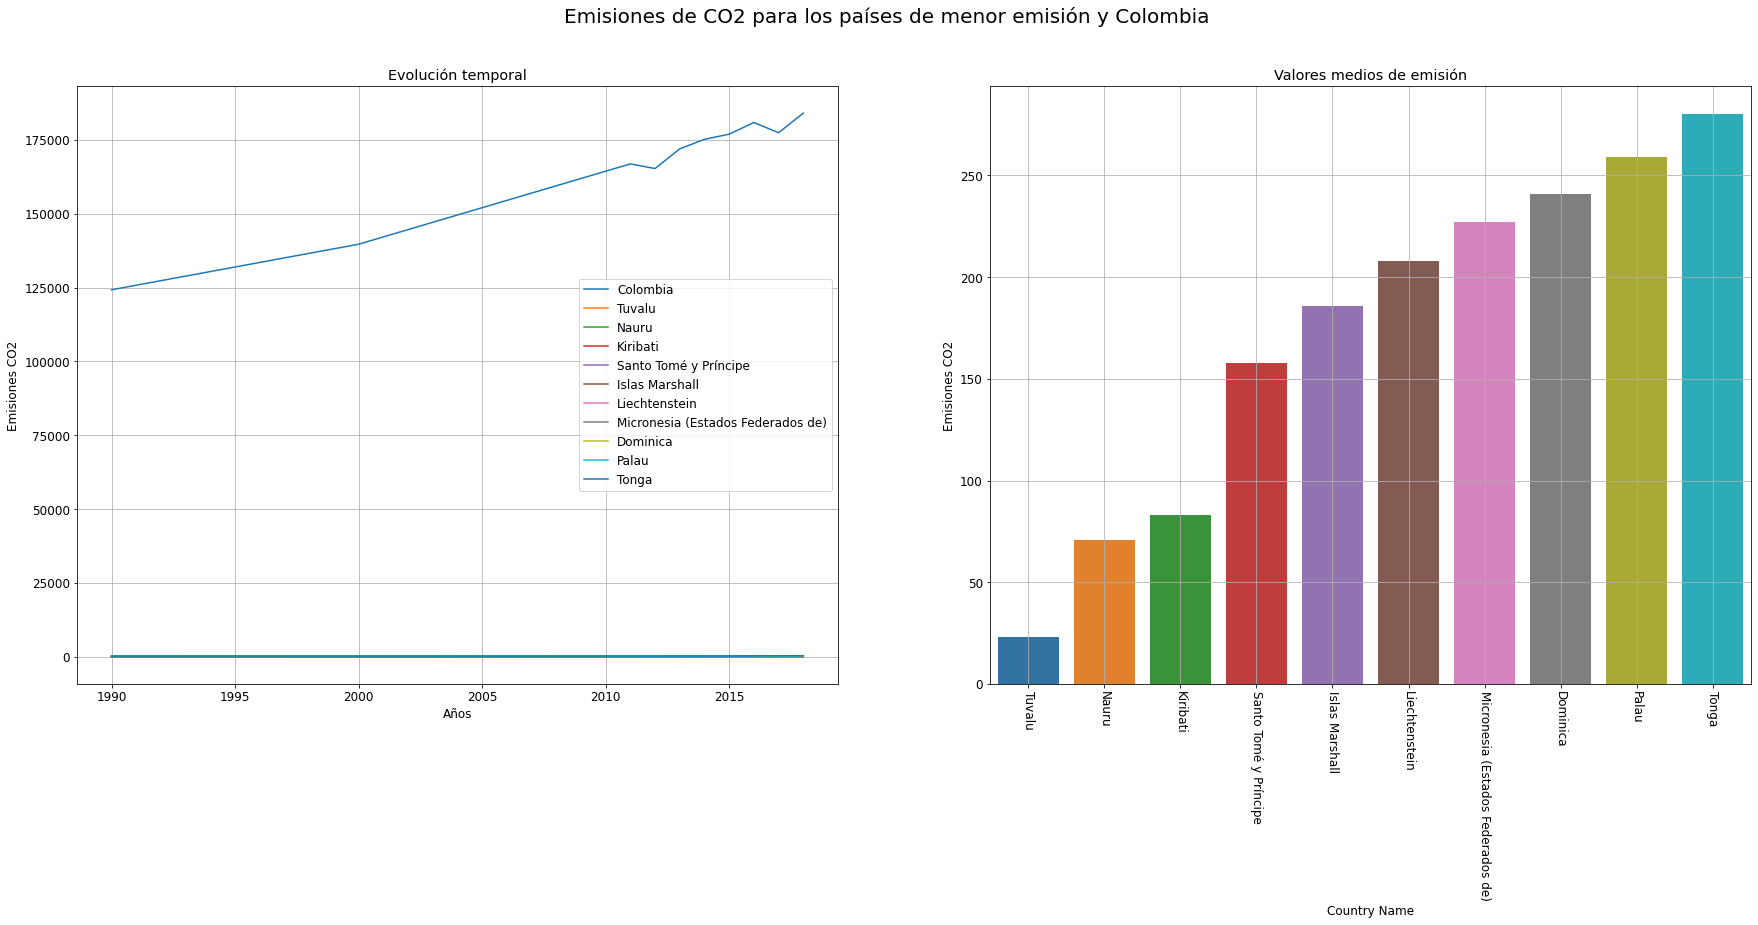

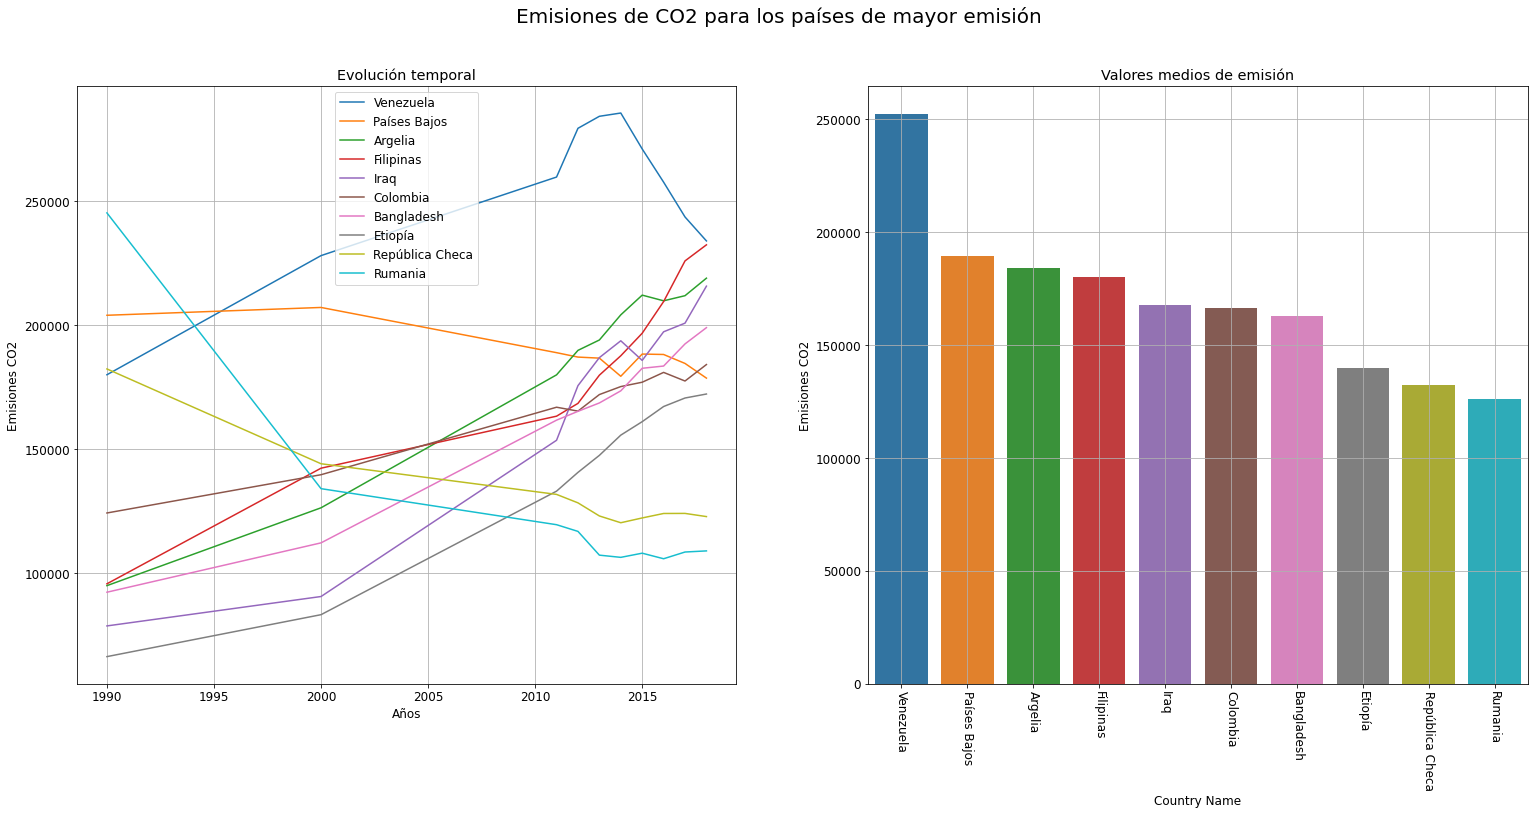

In [15]:
yrs = [1990, 2000, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# Gráfica de mínimas emisiones
fig, axs = plt.subplots(1, 2, figsize=(30,11))

fig.suptitle('Emisiones de CO2 para los países de menor emisión y Colombia', fontsize=20)

# Evolución temporal
axs[0].plot(np.array(yrs), emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia'][values_columns].values[0], label='Colombia')
axs[0].set_title('Evolución temporal')

for i in min_emision['Country Name']:
    axs[0].plot(yrs, min_emision[min_emision['Country Name'] == i][values_columns].values[0],label = i)

# Gráfico de barras sin Colombia

axs[0].set_xlabel('Años')
axs[0].set_ylabel('Emisiones CO2')
sns.barplot(x=min_emision['Country Name'], y=min_emision[values_columns].mean(axis=1))
axs[1].set_title("Valores medios de emisión")

plt.xticks(rotation=-90)

plt.ylabel('Emisiones CO2')
# Activa el Legend y el Grid
axs[0].legend()
for i in axs:
    i.grid()


# Gráfica de máximas emisiones
fig, axs = plt.subplots(1, 2, figsize=(26,11))

axs[0].set_title('Evolución temporal')
axs[1].set_title("Valores medios de emisión")

fig.suptitle('Emisiones de CO2 para los países de mayor emisión', fontsize=20)

for i in max_emision['Country Name']:
    axs[0].plot(yrs, max_emision[max_emision['Country Name'] == i][values_columns].values[0],label = i)


axs[0].set_xlabel('Años')
axs[0].set_ylabel('Emisiones CO2')
axs[0].legend()
sns.barplot(x=max_emision['Country Name'], y=max_emision[values_columns].mean(axis=1))
plt.xticks(rotation=-90)
plt.ylabel('Emisiones CO2')
for i in axs:
    i.grid()

Anotación: Se excluye a Colombia del gráfico de barras de los países con menores emisiones pues este es mucho mayor que todos ellos y no deja que se aprecie el comportamiento de los otros. También se tiene que las mayores y menores emisiones son una media de todos los años y no se está teniendo en cuenta los países de mayores emisiones que se eliminaron por ser datos atípicos.

### Punto 7:

In [16]:
# Realizamos una regresión lineal para predecir como se van anp.round(regression.predict(X = pd.DataFrame([2070]))[0][0],2) comportar las emisiones en 50 años
regression = lm.LinearRegression()
regression.fit(X = pd.DataFrame(yrs), y = emision_pais[emision_pais['Country Name']=='Colombia'][values_columns].T)

#print(regression.coef_, regression.intercept_)

print(f'Las emisiones de Colombia serán de {np.round(regression.predict(X = pd.DataFrame([2070]))[0][0],2)} en el año 2070, esto es un aumento del {np.round(100*(regression.predict(X = pd.DataFrame([2070]))[0][0]-e_2018)/e_2018,2)}% respecto a 2018')

Las emisiones de Colombia serán de 295163.26 en el año 2070, esto es un aumento del 60.33% respecto a 2018


In [17]:
regression_world= lm.LinearRegression()
regression_world.fit(X = pd.DataFrame(yrs), y = emisiones[emisiones['Country Name']=='Mundo'][values_columns].T)

m_2018=emisiones['2018 [YR2018]'][emisiones['Country Name']=='Mundo'].values[0]

#print(regression_world.coef_, regression_world.intercept_)

print(f'Las emisiones a nivel mundial serán de {np.round(regression_world.predict(X = pd.DataFrame([2070]))[0][0],2)} en el año 2070, esto es un aumento del {np.round(100*(regression_world.predict(X = pd.DataFrame([2070]))[0][0]-m_2018)/m_2018,2)}% respecto a 2018')

Las emisiones a nivel mundial serán de 78879251.82 en el año 2070, esto es un aumento del 71.95% respecto a 2018


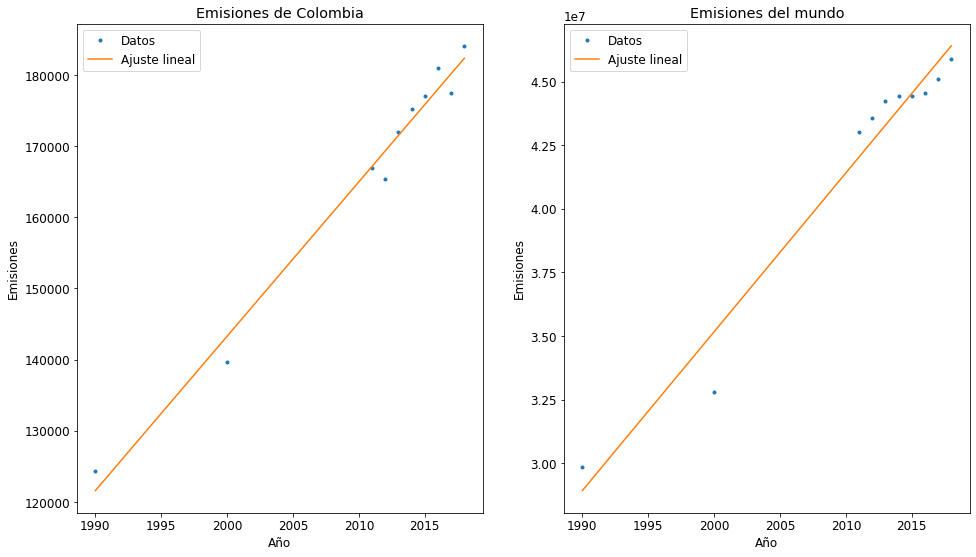

In [18]:
fig, axs = plt.subplots(1,2, figsize = (16,9))

Colombia_predict = regression.predict(X = pd.DataFrame(yrs))
axs[0].set_title('Emisiones de Colombia')
axs[0].plot(yrs, emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia'][values_columns].values[0], '.' ,label='Datos')
axs[0].plot(yrs, Colombia_predict, label = 'Ajuste lineal')
axs[0].legend()

axs[1].set_title('Emisiones del mundo')
World_predict = regression_world.predict(X = pd.DataFrame(yrs))
axs[1].plot(yrs, emisiones[emisiones['Country Name']=='Mundo'][values_columns].values[0], '.' ,label='Datos')
axs[1].plot(yrs, World_predict, label = 'Ajuste lineal')
axs[1].legend()

for i in axs:
    i.set_xlabel('Año')
    i.set_ylabel('Emisiones')

### Punto 8:

In [19]:
emision_pais[emision_pais['Country Name']=='Colombia'][values_columns].values[0]

array([124290., 139710., 166910., 165340., 172010., 175230., 176980.,
       180940., 177470., 184100.])

In [20]:
# Ampliemos el dataset filtrado utilizando los datasets de área selvática y crecimiento poblacional. Elegimos solo los países que habíamos seleccionado en el dataset de emisiones.

selvatica_pais = area_selvatica[area_selvatica['Country Name'].isin(emision_pais['Country Name'])][valid_columns]

# Reemplazamos los valores faltantes en los datasets por el valor de la media del año correspondiente
selvatica_pais = selvatica_pais.replace('..', np.nan)


selvatica_pais[values_columns] = selvatica_pais[values_columns].astype('float64')

# ADVERTENCIA: Esta sustitución con el valor de la media está sujeta a verificación. Aún no se ha hecho un análisis de valores atípicos.
selvatica_pais[values_columns] = selvatica_pais[values_columns].fillna(selvatica_pais[values_columns].mean())


selvatica_region = area_selvatica[area_selvatica['Country Name'].isin(emision_region['Country Name'])][valid_columns].dropna()
emision_region = emision_region.dropna()

In [21]:
# Ampliemos el dataset filtrado utilizando los datasets de área selvática y crecimiento poblacional. Elegimos solo los países que habíamos seleccionado en el dataset de emisiones.

selvatica_pais = area_selvatica[area_selvatica['Country Name'].isin(emision_pais['Country Name'])][valid_columns]
poblacion_pais = crecimiento_poblacional[crecimiento_poblacional['Country Name'].isin(emision_pais['Country Name'])][valid_columns]

emision_region = emision_region.dropna()
selvatica_region = area_selvatica[area_selvatica['Country Name'].isin(emision_region['Country Name'])][valid_columns].dropna()
poblacion_region = crecimiento_poblacional[area_selvatica['Country Name'].isin(emision_region['Country Name'])][valid_columns].dropna()

# Reemplazamos los valores faltantes en los datasets por el valor de la media del año correspondiente
selvatica_pais = selvatica_pais.replace('..', np.nan)
poblacion_pais = poblacion_pais.replace('..', np.nan)


selvatica_pais[values_columns] = selvatica_pais[values_columns].astype('float64')
poblacion_pais[values_columns] = poblacion_pais[values_columns].astype('float64')

poblacion_pais = poblacion_pais[poblacion_pais[values_columns].isnull().sum(axis=1) < 3]
selvatica_pais = selvatica_pais[selvatica_pais[values_columns].isnull().sum(axis=1) < 3]

m = selvatica_pais[values_columns].mean(axis=1)
for i, col in enumerate(selvatica_pais):
    selvatica_pais.iloc[:, i] = selvatica_pais.iloc[:, i].fillna(m)


emision_region[values_columns] = emision_region[values_columns].astype('float64')
poblacion_region[values_columns] = poblacion_region[values_columns].astype('float64')
selvatica_region[values_columns] = selvatica_region[values_columns].astype('float64')

In [22]:
def correlation_elements(df1, df2):
    correlation = df1.corrwith(df2, axis = 0).values

    corr1990 = correlation[0]
    corr2000 = correlation[1]
    corr2010 = np.mean(correlation[2:])

    return corr1990, corr2000, corr2010

In [23]:
dataframes = [emision_pais, selvatica_pais, poblacion_pais]

matrices = [np.zeros((3,3)), np.zeros((3,3)), np.zeros((3,3))]

for i in range(3):
    for j in range(3):
        for k in range(3):
            matrices[i][j,k] = correlation_elements(dataframes[j], dataframes[k])[i]

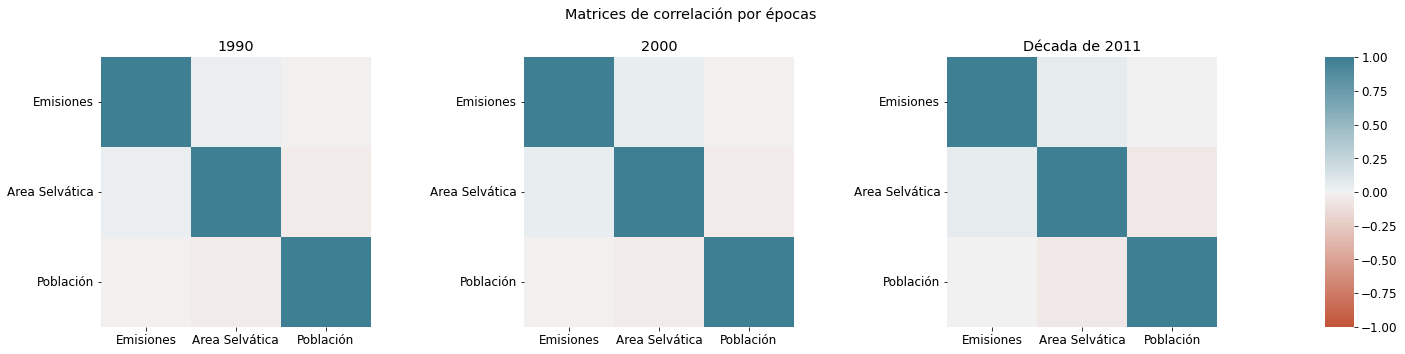

In [24]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(20,5), gridspec_kw={'width_ratios':[1,1,1,0.08]})
f.suptitle("Matrices de correlación por épocas")

cmap=sns.diverging_palette(20, 220, n=200)

ticks = ['Emisiones', 'Area Selvática', 'Población']

g1 = sns.heatmap(matrices[0],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax1)
g1.set_title('1990')

g2 = sns.heatmap(matrices[1],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax2)
g2.set_title('2000')

g3 = sns.heatmap(matrices[2],cmap=cmap, vmin=-1, vmax=1, center=0, square = True, ax=ax3, cbar_ax=axcb)
g3.set_title('Década de 2011')

for ax in [g1,g2,g3]:
    ax.set_xticklabels(ticks, rotation=0)
    ax.set_yticklabels(ticks, rotation=0)

plt.tight_layout()
plt.show()


De acuerdo con la matriz de correlación, no hay una clara correlación entre las emisiones de CO2, el área selvática y el crecimiento poblacional.

#### Punto 9:

In [25]:
# cargamos los datasets

# población total del mundo
poblacion_total=pd.read_csv('Datasets/Población total/Poblacion_total.csv',sep=',',skiprows=4)

# % de la energía total que representa la energía fósil
energia_fosil=pd.read_csv('Datasets/Energía fósil/Energia fosil.csv',sep=',',skiprows=4)

# % de la energía total que representa la energía renovable
energia_renovable=pd.read_csv('Datasets/Energía renovable/Energía renovable.csv',sep=',',skiprows=4)

# % de la energía total que representa la energía nuclear y alternativa
energia_nuclear=pd.read_csv('Datasets/Energia nuclear/Energia nuclear.csv',sep=',',skiprows=4)

# PIB en USD actuales
PIB = pd.read_csv('Datasets/PIB/PIB.csv', sep=',')

# PIB per capita
PIB_percapita= pd.read_csv('Datasets/PIB per cápita/pib_percapita.csv', sep=',')

# Crecimiento de la población urbana
poblacion_urbana=pd.read_csv('Datasets/Población urbana/poblacion_urbana.csv',sep=',',skiprows=4)

In [26]:
#Definimos unas funciones para manipular los nuevos datasets y adaptarlos a la estructura original

def new_key(st):
    """Cambia el formato de un string. Usado para cambiar las columnas de año al formato 'XXXX [YRXXXX]'"""
    try:
        int(st)
        new_st = str(st) + ' [YR{}]'.format(st)
    except:
        new_st = st
    return new_st

def red_keys(df):
    """Cabmia las keys del dataframe por las nuevas"""
    keys = df.keys().values
    values = []
    for i in keys:
        values.append(new_key(i))
    # print(keys, values)
    df = df.rename(columns = dict(zip(keys, values)))
    return df

# Function that moves 3 and 4 columns to the beginning of the dataframe
def move_columns_and_rename(df):
    cols = df.columns.tolist()
    cols = cols[2:4] + cols[:2] + cols[4:]

    df = df[cols]
    keys = df.keys().values
    values = keys.copy()
    values[0] = 'Series Name'
    values[1] = 'Series Code'

    df = df.rename(columns = dict(zip(keys, values)))
    return df

def clean_dataframe(df):
    # df = df[df['Country Name'].isin(emision_pais['Country Name'])][valid_columns]
    df = df[valid_columns]
    df = df[df[values_columns].isnull().sum(axis=1) < 3]

    df.reset_index(drop=True, inplace=True)

    # Una posible solución es calcular la media sin valores atípicos, pero seguir incluyendo estos valores en el análisis final
    #df[values_columns] = df[values_columns].fillna(df[values_columns].mean(axis=1),axis=1)

    df[values_columns] = df[values_columns].astype('float64')

    m = df[values_columns].mean(axis=1)
    for i, col in enumerate(df):
        df.iloc[:, i] = df.iloc[:, i].fillna(m)

    return df

def main_readapt_dataframe(df):
    df = red_keys(df)
    df = move_columns_and_rename(df)
    df = clean_dataframe(df)

    return df

In [27]:
poblacion_total = main_readapt_dataframe(poblacion_total.iloc[:,np.r_[0:4,34,44,55:63]])
energia_fosil = main_readapt_dataframe(energia_fosil.iloc[:,np.r_[0:4,34,44,55:63]])
energia_renovable = main_readapt_dataframe(energia_renovable.iloc[:,np.r_[0:4,34,44,55:63]])
energia_nuclear = main_readapt_dataframe(energia_nuclear.iloc[:,np.r_[0:4,34,44,55:63]])
poblacion_urbana = main_readapt_dataframe(poblacion_urbana.iloc[:,np.r_[0:4,34,44,55:63]])

# El dataset de PIB tiene un formato distinto, más similar al formato original

PIB = PIB.replace('..', np.nan)
PIB = clean_dataframe(PIB).dropna()

PIB_percapita=PIB_percapita.replace('..', np.nan)
PIB_percapita = clean_dataframe(PIB_percapita).dropna()

In [28]:
paises_comunes = pd.Series(list(set(emision_pais['Country Code']) &
                                set(poblacion_total['Country Code']) & 
                                set(energia_renovable['Country Code']) &
                                set(PIB['Country Code'])&
                                set(PIB_percapita['Country Code'])&
                                set(poblacion_urbana['Country Code'])))

paises_comunes_filtrado = pd.Series(list(set(paises_comunes) & 
                                        set(emision_pais_filtrado['Country Code'])))

In [29]:
poblacion_total = poblacion_total[poblacion_total['Country Code'].isin(paises_comunes)]
poblacion_total_filtrado = poblacion_total[poblacion_total['Country Code'].isin(paises_comunes_filtrado)]

energia_renovable = energia_renovable[energia_renovable["Country Code"].isin(paises_comunes)]
energia_renovable_filtrado = energia_renovable[energia_renovable["Country Code"].isin(paises_comunes_filtrado)]

emision_pais = emision_pais[emision_pais["Country Code"].isin(paises_comunes)]
emision_pais_filtrado = emision_pais[emision_pais["Country Code"].isin(paises_comunes_filtrado)]

selvatica_pais = selvatica_pais[selvatica_pais["Country Code"].isin(paises_comunes)]
selvatica_pais_filtrado = selvatica_pais[selvatica_pais["Country Code"].isin(paises_comunes_filtrado)]

poblacion_pais = poblacion_pais[poblacion_pais["Country Code"].isin(paises_comunes)]
poblacion_pais_filtrado = poblacion_pais[poblacion_pais["Country Code"].isin(paises_comunes_filtrado)]

PIB = PIB[PIB["Country Code"].isin(paises_comunes)]
PIB_filtrado = PIB[PIB["Country Code"].isin(paises_comunes_filtrado)]

PIB_percapita= PIB_percapita[PIB_percapita["Country Code"].isin(paises_comunes)]
PIB_percapita_filtrado = PIB_percapita[PIB_percapita["Country Code"].isin(paises_comunes_filtrado)]

poblacion_urbana = poblacion_urbana[poblacion_urbana["Country Code"].isin(paises_comunes)]
poblacion_urbana_filtrado = poblacion_urbana[poblacion_urbana["Country Code"].isin(paises_comunes_filtrado)]

In [30]:
dataframes_ampliado = [emision_pais, selvatica_pais, poblacion_pais, poblacion_urbana, poblacion_total, PIB, PIB_percapita, energia_renovable]
dataframes_ampliado_filtrado = [emision_pais_filtrado, selvatica_pais_filtrado, poblacion_pais_filtrado, poblacion_urbana_filtrado, poblacion_total_filtrado, PIB_filtrado, PIB_percapita_filtrado,energia_renovable_filtrado]

n = len(dataframes_ampliado)
matrices_amp = [np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n))]
matrices_amp_filt = [np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n))]

for i in range(3):
    for j in range(n):
        for k in range(n):
            matrices_amp[i][j,k] = correlation_elements(dataframes_ampliado[j], dataframes_ampliado[k])[i]
            matrices_amp_filt[i][j,k] = correlation_elements(dataframes_ampliado_filtrado[j], dataframes_ampliado_filtrado[k])[i]

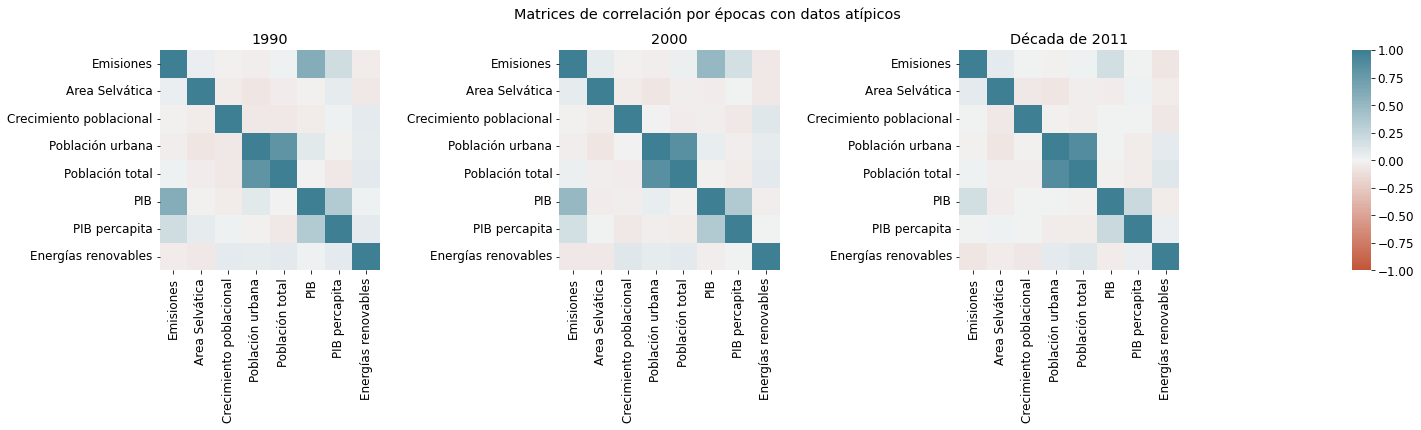

In [31]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(20,6), gridspec_kw={'width_ratios':[1,1,1,0.08]})
f.suptitle("Matrices de correlación por épocas con datos atípicos")

cmap=sns.diverging_palette(20, 220, n=200)

ticks = ['Emisiones', 'Area Selvática', 'Crecimiento poblacional', "Población urbana", 'Población total', "PIB", "PIB percapita", "Energías renovables"]

g1 = sns.heatmap(matrices_amp[0],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax1)
g1.set_title('1990')

g2 = sns.heatmap(matrices_amp[1],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax2)
g2.set_title('2000')

g3 = sns.heatmap(matrices_amp[2],cmap=cmap, vmin=-1, vmax=1, center=0, square = True, ax=ax3, cbar_ax=axcb)
g3.set_title('Década de 2011')

for ax in [g1,g2,g3]:
    ax.set_xticklabels(ticks, rotation=90)
    ax.set_yticklabels(ticks, rotation=0)

plt.tight_layout()

plt.show()

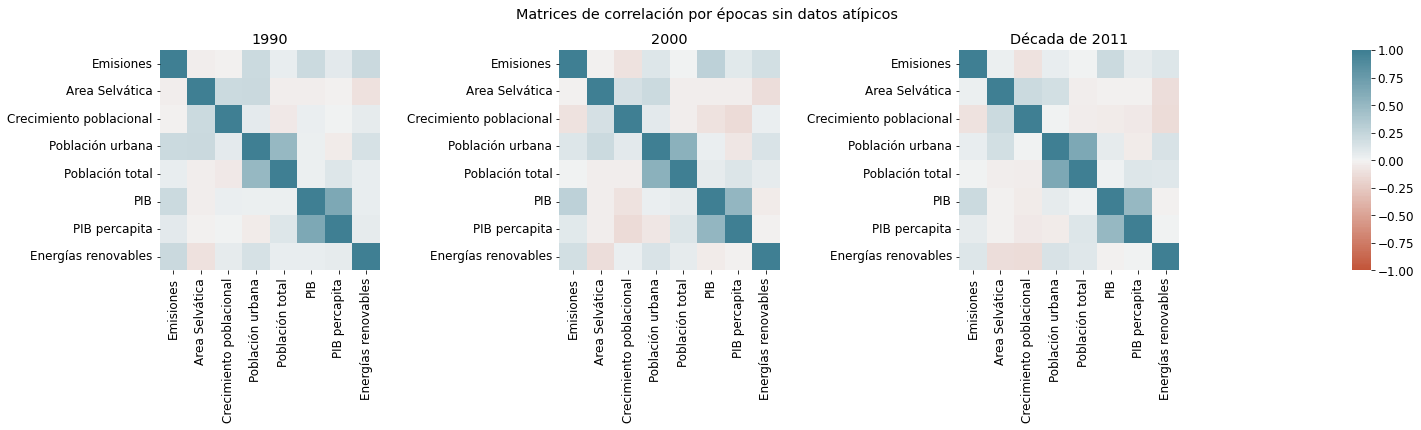

In [32]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(20,6), gridspec_kw={'width_ratios':[1,1,1,0.08]})
f.suptitle("Matrices de correlación por épocas sin datos atípicos")

cmap=sns.diverging_palette(20, 220, n=200)

ticks = ['Emisiones', 'Area Selvática', 'Crecimiento poblacional', "Población urbana", 'Población total', "PIB", "PIB percapita", "Energías renovables"]

g1 = sns.heatmap(matrices_amp_filt[0],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax1)
g1.set_title('1990')

g2 = sns.heatmap(matrices_amp_filt[1],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax2)
g2.set_title('2000')

g3 = sns.heatmap(matrices_amp_filt[2],cmap=cmap, vmin=-1, vmax=1, center=0, square = True, ax=ax3, cbar_ax=axcb)
g3.set_title('Década de 2011')

for ax in [g1,g2,g3]:
    ax.set_xticklabels(ticks, rotation=90)
    ax.set_yticklabels(ticks, rotation=0)

plt.tight_layout()

plt.show()

#### Conclusiones

De acuerdo con los datos analizados, se puede observar que, al excluir datos atípicos, Colombia es uno de los países que mayor emisión de CO2 tiene, y estas emisiones están en aumento. Se puede predecir que en unos 50 años el país tendrá aproximadamente una emisión 60% mayor a la actual si se mantiene el ritmo de crecimiento actual.

Para analizar las posibles causas de la emisión de CO2, se calculó la correlación entre esta y otras variables como lo son el área selvática, el crecimiento poblacional, la población total, la población urbana, el PIB, el PIB per cápita y el porcentaje de energías renovables. A partir de las matrices de correlación, se observa que hay una evolución temporal a lo largo de 2 décadas, donde la variable con mayor correlación con las emisiones es el PIB, seguido del PIB per cápita, esta correlación va disminuyendo con el paso del tiempo, y además indica que entre más desarrollado económicamente está el país, más emisiones de CO2 genera. 

Las matrices de correlación se presentan en 2 casos: con datos atípicos y sin datos atípicos. En el caso con datos atípicos, observamos que la correlación entre las emisiones de CO2 y la población total de cada país es muy baja, lo que indica que el número de personas no es un determinante de la contaminación generada. En el caso sin datos atípicos, la correlación también es baja, pero es ligeramente mayor que en el caso con datos atípicos, lo cual se debe a que para los datos atípicos, el desarrollo económico y otras variables son más relevantes. En particular, se observa que para el dataset sin datos atípicos, la correlación es mayor si se tiene en cuenta solo la población urbana, lo cual podría indicar que este es el grupo que genera mayor cantidad de emisiones de CO2.

Por otra parte, el crecimiento poblacional no presenta una correlación clara con las emisiones, ya que el valor cambia de magnitud y de signo dependiendo de la época en la que se observe y de si se incluyen datos atípicos o no. Esto indica que el crecimiento poblacional no está relacionado a corto plazo con las emisiones de CO2.

Para las energías renovables no se presenta un comportamiento claro con y sin datos atípicos, ya que para el caso con datos atípicos la correlación es negativa, mientras que para el caso con datos atípicos la correlación es positiva, lo cual podría indicar que los países con mayor emisión de CO2 son los que tienen mayor porcentaje de energías renovables, pero no es suficiente para afectar significativamente las emisiones.

En general, no hay correlación entre las variables de emisión de CO2 y una sola de las demás variables, lo cual se debe a que las emisiones de CO2 dependen de muchos factores a la vez, y no es posible predecir la emisión observando solo una variable.
